In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import torch

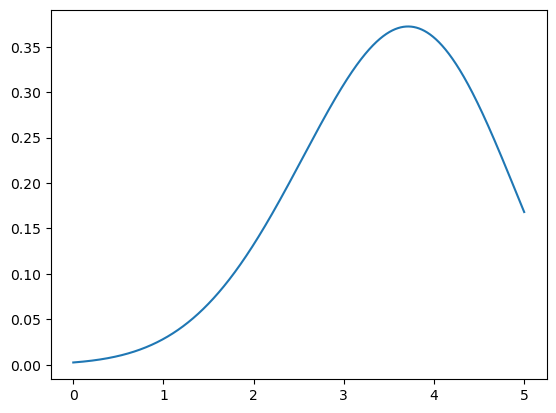

In [60]:
n=5
p=.7
k = np.linspace(0,n,100000)
pdf = np.exp(k*np.log(p)+(n-k)*np.log(1-p)+scipy.special.loggamma(n+1)-scipy.special.loggamma(k+1)-scipy.special.loggamma(n-k+1))
plt.plot(k,pdf)

In [ ]:
def trapezoid_integration(x_dist,y_dist, definite=True):
    if definite:
        return np.diff(x_dist).dot((y_dist[:-1]+y_dist[1:])/2)
    else:
        return np.insert(np.cumsum(np.diff(x_dist)*((y_dist[:-1]+y_dist[1:])/2)), 0, 0)

15.645313106142066

In [53]:
integrals = []
for n in range(1,101):
    k = np.linspace(0,n,100000)
    pdf = np.exp(k*np.log(p)+(n-k)*np.log(1-p)+scipy.special.loggamma(n+1)-scipy.special.loggamma(k+1)-scipy.special.loggamma(n-k+1))
    integrals.append(trapezoid_integration(k,pdf))

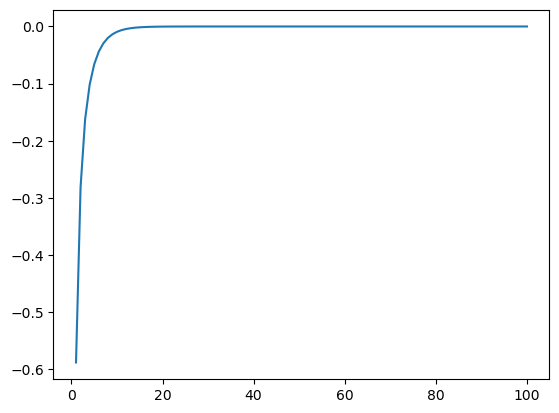

In [56]:
plt.plot(range(1,101),np.log(integrals))

In [ ]:
scipy.special.polygamma(1,)

In [49]:
trapezoid_integration(k,pdf)

0.9360830944567406

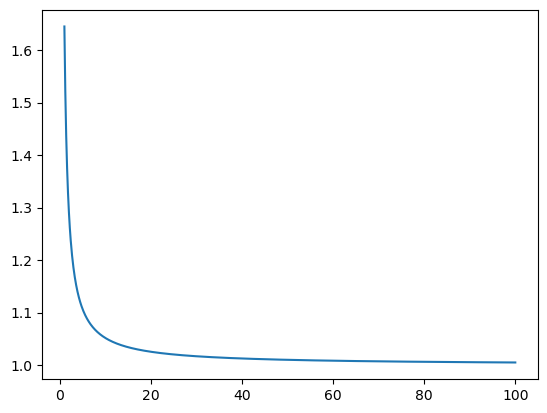

In [59]:
x = np.linspace(1,100,1000)
# plt.plot(x, scipy.special.polygamma(1,x))
# plt.plot(x,1/x)
# plt.yscale('log')
plt.plot(x,x*scipy.special.polygamma(1,x))

In [60]:
def n_d_gaussian_process(candidate_x, x_data, z_data):
    a = torch.square(candidate_x-x_data.unsqueeze(-1)).sum(axis=1)
    variance = 1/(1/a).sum(axis=0)
    mean = (z_data.unsqueeze(-1)/a).sum(axis=0)*variance
    return mean, variance

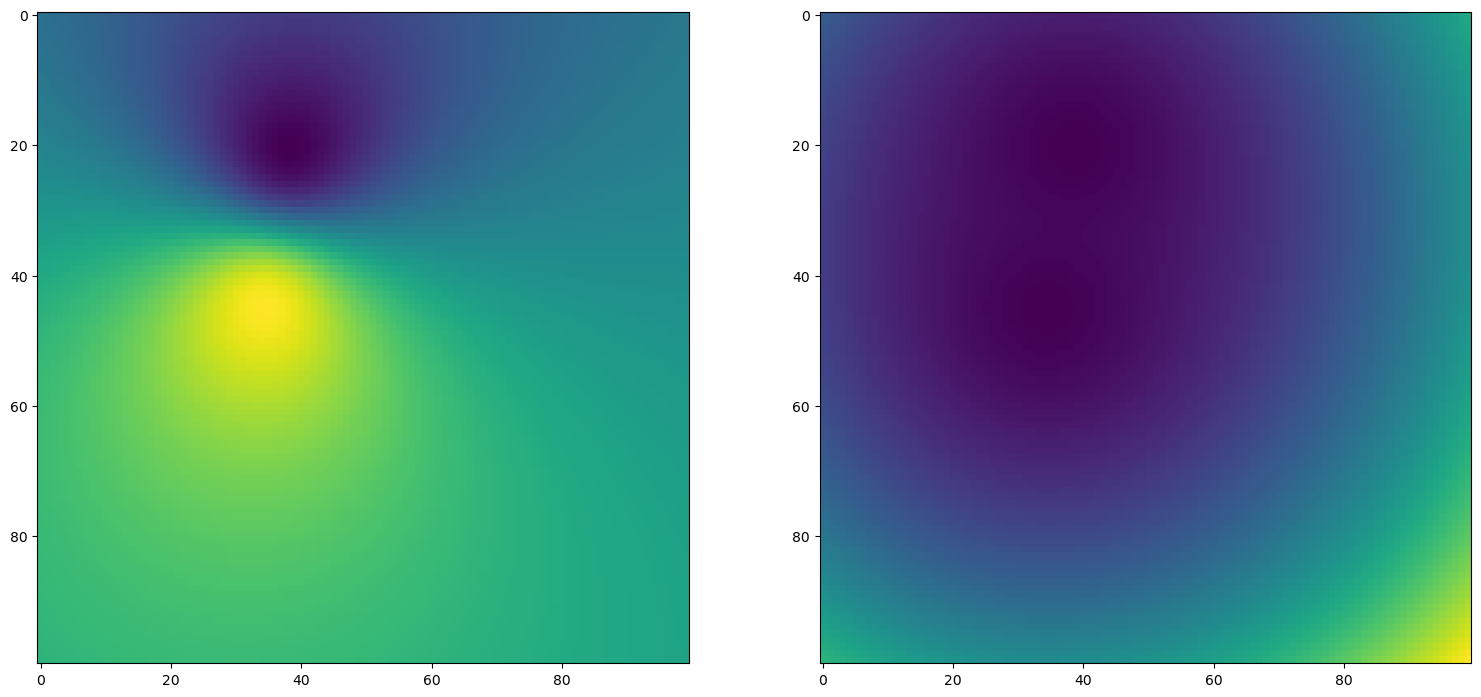

In [96]:
num_datapoints = 2
x_data = torch.randn(num_datapoints,2)
z_data = torch.randn(num_datapoints)
x = torch.linspace(-3,3,100)
candidate_x = torch.stack(torch.meshgrid(x,x)).view(1,2,-1)
mean, variance = n_d_gaussian_process(candidate_x, x_data, z_data)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mean.view(100,100))
axarr[1].imshow(variance.view(100,100))
f.set_size_inches(18.5, 10.5)

In [162]:
candidate_x.shape

torch.Size([1, 2, 10000])

In [176]:
num_datapoints = 10
x_data = torch.randn(num_datapoints,2)
z_data = torch.randint(high=2,size=(num_datapoints,))
x = torch.linspace(-3,3,100)
candidate_x = torch.stack(torch.meshgrid(x,x)).view(1,2,-1)
def n_d_dirichlet_process(candidate_x, x_data, z_data, K):
    inverse_square_distances = 1/torch.square(candidate_x-x_data.unsqueeze(-1)).sum(axis=1)
    inverse_square_distance_sums = 1/2 + torch.vstack([inverse_square_distances[z_data==i].sum(axis=0) for i in range(K)])
    n = inverse_square_distance_sums.sum(axis=0)
    p = inverse_square_distance_sums/n
    return n, p

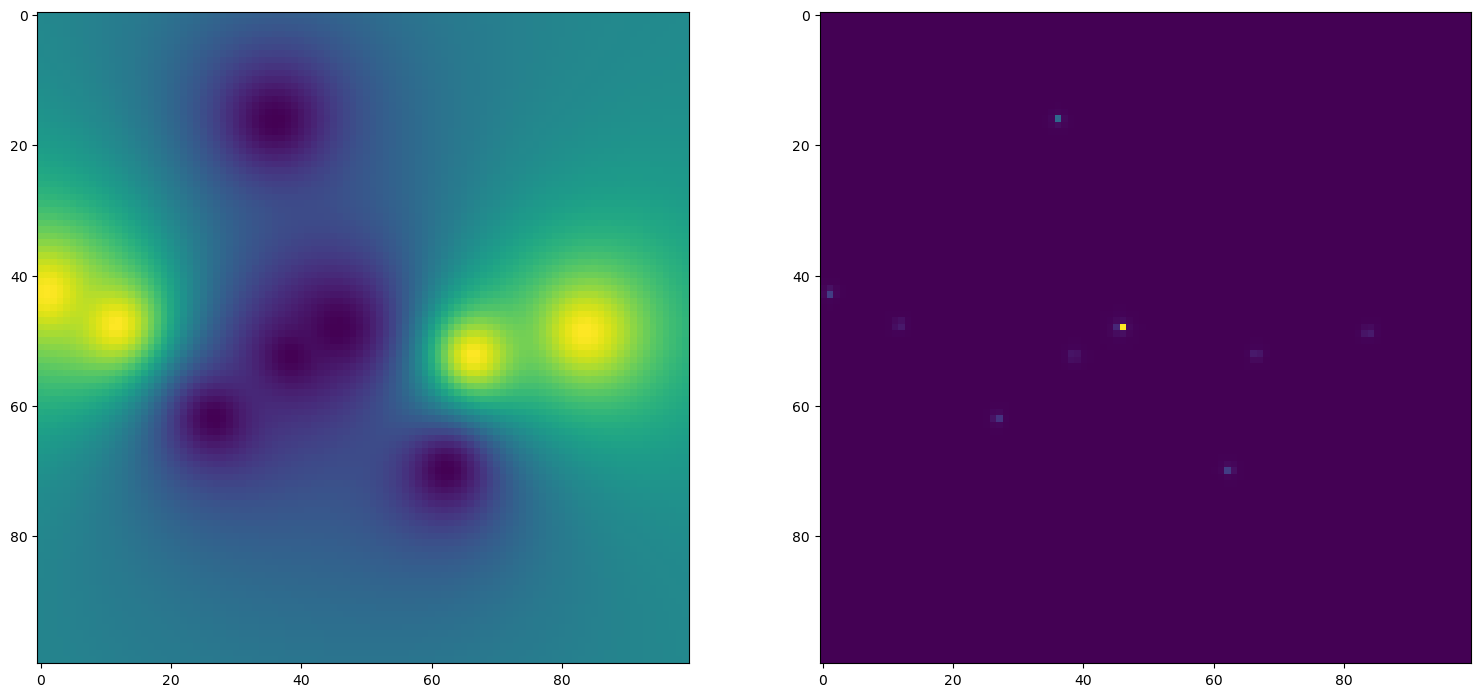

In [178]:
n, p = n_d_dirichlet_process(candidate_x, x_data, z_data, 2)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(p[0].view(100,100))
axarr[1].imshow(n.view(100,100))
f.set_size_inches(18.5, 10.5)

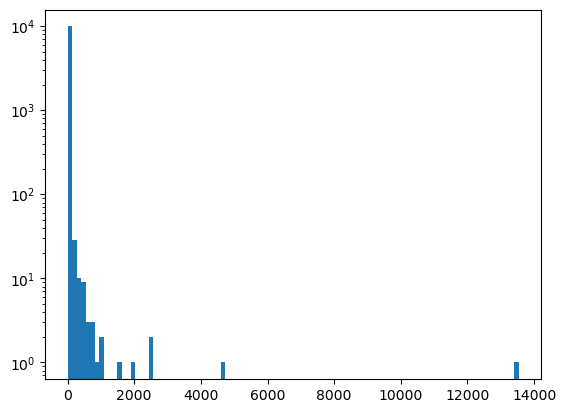

In [182]:
plt.hist(n,bins=100)
plt.yscale('log')

In [166]:
K=5
torch.multinomial(torch.ones(K)/K,num_samples=10, replacement=True)

tensor([4, 1, 0, 2, 0, 4, 2, 0, 4, 1])

In [160]:
p = inverse_square_distance_sums/n

In [169]:
m = torch.distributions.categorical.Categorical(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]))
m.sample(torch.tensor([10]))

tensor([0, 0, 2, 3, 1, 0, 1, 2, 0, 1])

In [172]:
torch.multinomial(torch.tensor([ 0.25, 0.25, 0.25, 0.25 ]),num_samples=5, replacement=True)

tensor([0, 3, 3, 2, 2])